In [6]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

data_dir = '/pscratch/sd/e/efdez/Uchuu/Y1/'
data_fn = Path(data_dir) / 'uchuu-desi-y3_v2_0p65_mask.txt'
data = np.genfromtxt(data_fn, usecols=(-3, -2, -1), skip_header=1)


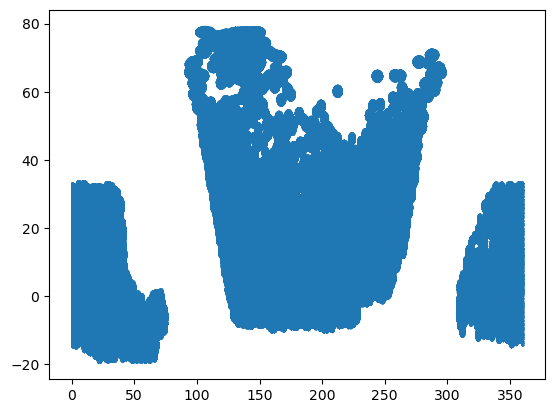

In [7]:
fig, ax = plt.subplots()
ax.scatter(data[:, 0], data[:, 1], s=0.1, marker='.')
plt.show()

In [ ]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

zmin, zmax = 0.6, 0.8
bins = np.linspace(-1, 10, 100)

for smoothing_radius in [5.0, 7.5, 10.0]:

    data_dir = '/pscratch/sd/e/epaillas/cic'
    data_fn = Path(data_dir) / f'CIC_LRG_z{zmin}-{zmax}_sm{smoothing_radius}.npy'
    cic_data = np.load(data_fn)
    # cic_data = cic_data[(cic_data > -1) & (cic_data < 30)]

    data_dir = '/pscratch/sd/e/epaillas/cic'
    data_fn = Path(data_dir) / f'CIC_Uchuu_LRG_z{zmin}-{zmax}_sm{smoothing_radius}.npy'
    cic_uchuu = np.load(data_fn)
    # cic_uchuu = cic_uchuu[(cic_uchuu > -1) & (cic_uchuu < 30)]

    fig, ax = plt.subplots(figsize=(4, 3))

    ax.hist((1 + cic_data), bins=bins, density=True, alpha=1.0, label='DESI Y3', histtype='step')
    ax.hist((1 + cic_uchuu), bins=bins, density=True, alpha=1.0, label='Uchuu-GLAM', histtype='step', ls='--')

    ax.set_xlim(-0.2, 4.0)
    # ax.set_xscale('log')
    # ax.set_yscale('log')
    ax.set_xlabel(r'$1 + \Delta$', fontsize=15)
    ax.set_ylabel('PDF', fontsize=15)
    ax.legend()
    ax.set_title(rf'$R_s = {smoothing_radius}\, h^{{-1}}{{\rm Mpc}}$')
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_363145/610638406.py:42: RuntimeWarning: invalid value encountered in divide
  ax[1].plot(bin_centres, (hist_uchuu-hist_desi)/hist_desi)


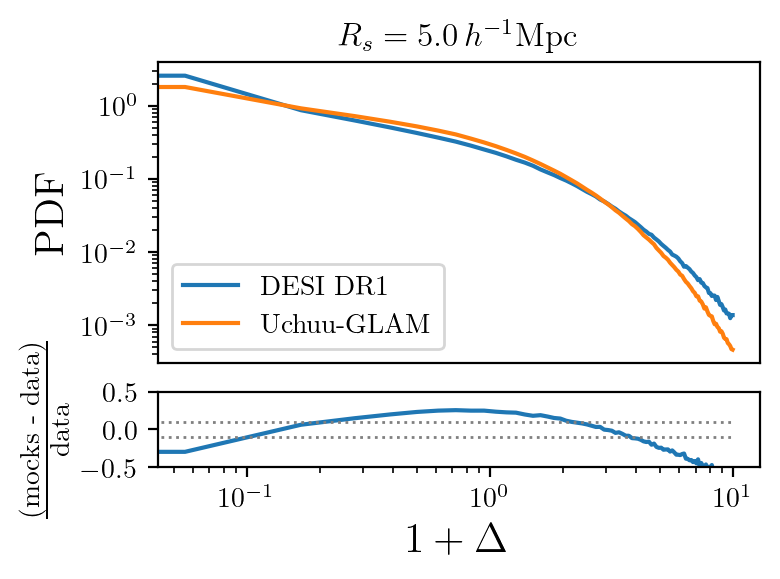

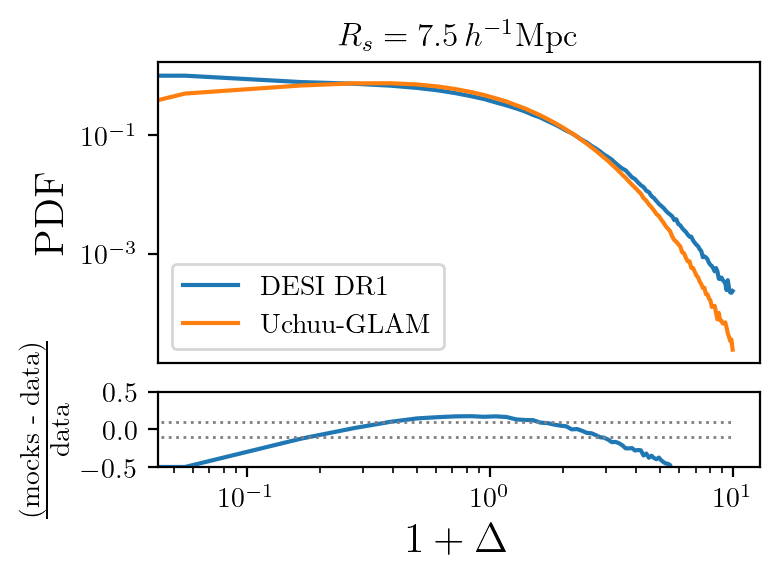

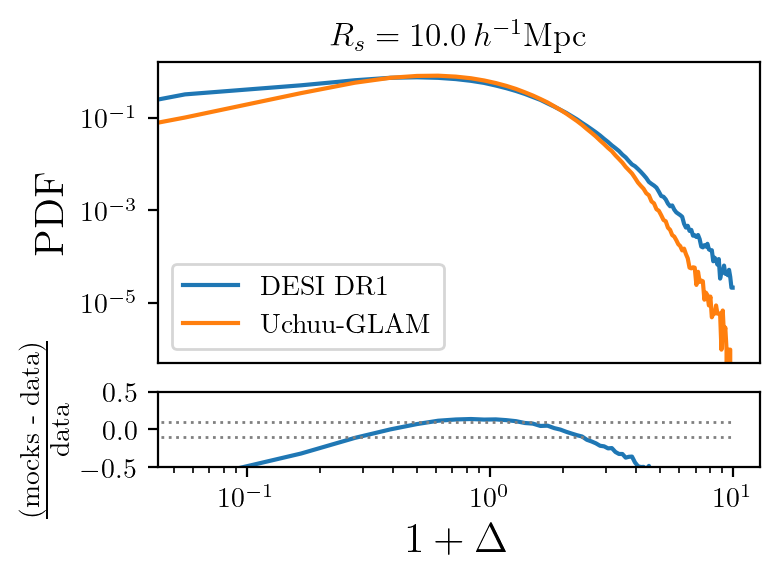

In [3]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

zmin, zmax = 0.8, 1.1
bins = np.linspace(-1, 10, 100)

for smoothing_radius in [5.0, 7.5, 10.0]:

    data_dir = '/pscratch/sd/e/epaillas/cic'
    # data_fn = Path(data_dir) / f'CIC_LRG_z{zmin}-{zmax}_sm{smoothing_radius}.npy'
    data_fn = Path(data_dir) / f'CIC_LRG_NGC_DESI_DR1_z{zmin}-{zmax}_sm{smoothing_radius}.npy'
    cic_data = np.load(data_fn)
    # cic_data = cic_data[(cic_data > -1) & (cic_data < 30)]
    
    # data_dir = '/pscratch/sd/e/epaillas/cic'
    # # data_fn = Path(data_dir) / f'CIC_LRG_z{zmin}-{zmax}_sm{smoothing_radius}.npy'
    # data_fn = Path(data_dir) / f'CIC_LRG_NGC_DESI_DR1_z{zmin}-{zmax}_sm{smoothing_radius}_noweights.npy'
    # cic_data_nw = np.load(data_fn)
    # # cic_data = cic_data[(cic_data > -1) & (cic_data < 30)]

    data_dir = '/pscratch/sd/e/epaillas/cic'
    data_fn = Path(data_dir) / f'CIC_LRG_NGC_Uchuu_Y3v0_z{zmin}-{zmax}_sm{smoothing_radius}.npy'
    cic_uchuu = np.load(data_fn)
    # cic_uchuu = cic_uchuu[(cic_uchuu > -1) & (cic_uchuu < 30)]

    fig, ax = plt.subplots(2, 1, figsize=(4, 3), gridspec_kw={'height_ratios': [4, 1]}, sharex=True)

    hist_desi, bin_edges = np.histogram((1 + cic_data), bins=bins, density=True)
    # hist_desi_nw, bin_edges = np.histogram((1 + cic_data_nw), bins=bins, density=True)
    hist_uchuu, bin_edges = np.histogram((1 + cic_uchuu), bins=bins, density=True)
    bin_centres = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    ax[0].plot(bin_centres, hist_desi, label='DESI DR1')
    # ax[0].plot(bin_centres, hist_desi_nw, label='DESI DR1 (no weights)')
    ax[0].plot(bin_centres, hist_uchuu, label='Uchuu-GLAM')
    
    ax[1].plot(bin_centres, (hist_uchuu-hist_desi)/hist_desi)
    
    # ax[0].set_xlim(-0.2, 4.0)
    ax[1].set_ylim(-0.5, 0.5)
    ax[1].plot(bin_centres, np.ones_like(bin_centres) * -0.1, color='grey', lw=1.0, ls=':')
    ax[1].plot(bin_centres, np.ones_like(bin_centres) * 0.1, color='grey', lw=1.0, ls=':')
    ax[0].set_xscale('log')
    ax[0].set_yscale('log')
    ax[1].set_xlabel(r'$1 + \Delta$', fontsize=15)
    ax[0].set_ylabel('PDF', fontsize=15)
    ax[0].legend()
    ax[0].axes.get_xaxis().set_visible(False)
    ax[1].set_ylabel(r'$\frac{\textrm{(mocks - data)}}{\textrm{data}}$')
    ax[0].set_title(rf'$R_s = {smoothing_radius}\, h^{{-1}}{{\rm Mpc}}$')
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.15)
    plt.show()